In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [8]:
# Посмотреть типы данных для всех столбцов
print(df.dtypes)


Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [107]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')
print(df['Дата'].head())
print(df['Дата'].dtypes)


0   2018-01-04
1   2018-01-04
2   2018-01-04
3   2018-01-04
4   2018-01-04
Name: Дата, dtype: datetime64[ns]
datetime64[ns]


Сгруппируйте данные по дате, посчитайте количество продаж

In [109]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество_Продаж')

print(grouped_df)

          Дата  Количество_Продаж
0   2018-01-04               1840
1   2018-01-05               1301
2   2018-01-06               1306
3   2018-01-07               1322
4   2018-01-09               1719
..         ...                ...
200 2018-08-26               1462
201 2018-08-28               1731
202 2018-08-29               1497
203 2018-08-30               1445
204 2018-08-31               1366

[205 rows x 2 columns]


Вывести несколько первых строк сгруппированных данных

In [103]:
print(grouped_df.head())

  Номенклатура  Количество
0    product_0        1324
1    product_1        2267
2   product_10         129
3   product_11         131
4   product_12         129


Нарисуйте график продаж у `grouped_df`

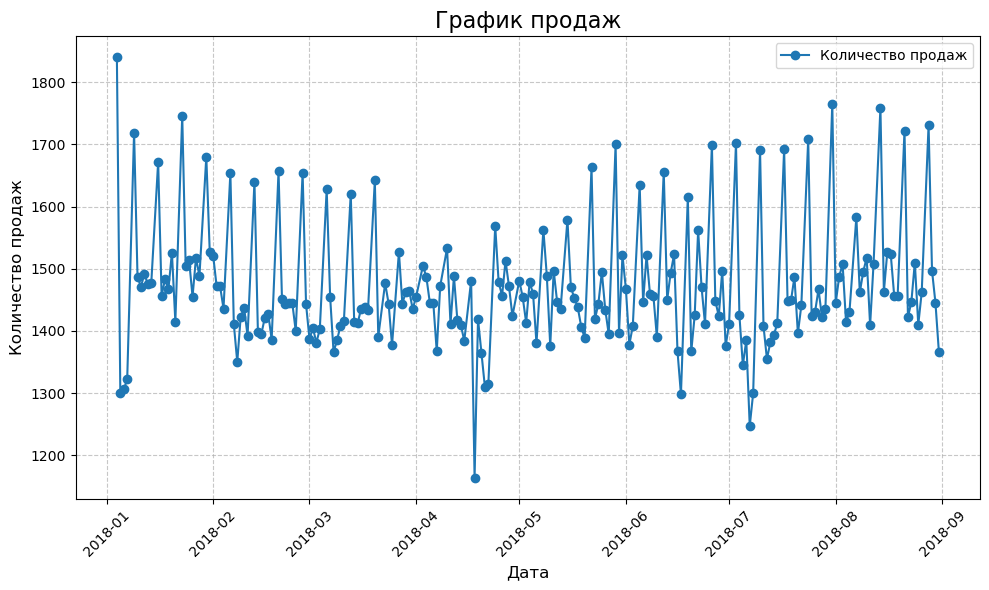

In [16]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество_Продаж'], marker='o', linestyle='-', label='Количество продаж')

# Настройки графика
plt.title('График продаж', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Показ графика
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
Название графика:

График показывает динамику количества продаж в зависимости от даты.
Оси:
Ось X (горизонтальная): На ней отображаются даты. Они представлены в формате год-месяц-день (например, 2023-01-01). 
Ось Y (вертикальная): Она показывает количество продаж. Значения на оси увеличиваются с шагом, соответствующим интервалу данных.

Данные:
График отображает продажи, соответствующие месяцам за 2018 год с января по сентябрь.
Для каждой даты имеется одна точка, соединённая линией с соседними, что делает график линейным.
Вид графика:

Тип графика: Линейный график с маркерами (o), которые выделяют конкретные значения данных.
Линии соединяют точки, что создаёт визуализацию тренда изменений в данных.
Тренд:

На 2018-01 продажи начинаются на уровне 1840.
На 2018-02 продажи падают до 1301.
Далее по месяцам мы видим то рост то спад, но к концу периода 2018-09 наблюдается рост продаж до 1719
    

Сетка:
График имеет сетку, которая помогает точнее интерпретировать значения, соотнеся их с осями.

Легенда:
График имеет легенду "Количество продаж", которая объясняет, что именно представлено на графике.

Выводы:
Резкий рост продаж наблюдается в начале на 2018-01
Снижение продаж происходит между 2018-04 и 2018-05.
График показывает, что данные изменчивы, и требуется дополнительный анализ для понимания причин колебаний.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [31]:
# Группировка по дате для подсчёта количества продаж
grouped_df = df.groupby('Дата').size().reset_index(name='Количество_Продаж')

# Рассчитаем IQR (межквартильный размах) для количества продаж
q1 = grouped_df['Количество_Продаж'].quantile(0.25)  # Первый квартиль
q3 = grouped_df['Количество_Продаж'].quantile(0.75)  # Третий квартиль
iqr = q3 - q1  # Межквартильный размах

# Границы для выбросов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Фильтруем строки с выбросами
outliers = grouped_df[(grouped_df['Количество_Продаж'] < lower_bound) | (grouped_df['Количество_Продаж'] > upper_bound)]

# Найдём строку с максимальным выбросом
if not outliers.empty:
    max_outlier = outliers.loc[outliers['Количество_Продаж'].idxmax()]
    print("Строка с максимальным выбросом:")
    print(max_outlier)
else:
    print("Выбросов не найдено.")

Строка с максимальным выбросом:
Дата                 2018-01-04 00:00:00
Количество_Продаж                   1840
Name: 0, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [33]:
# Фильтруем по средам, июню, июлю и августу, и складу 3
filtered_df = df[
    (df['Дата'].dt.month.isin([6, 7, 8])) &  # Июнь, июль, август
    (df['Дата'].dt.weekday == 2) &  # Среда (в pandas понедельник = 0, среда = 2)
    (df['Склад'] == 3)  # Склад 3
]

# Группируем по номенклатуре и суммируем количество
grouped_df = filtered_df.groupby('Номенклатура')['Количество'].sum().reset_index()

# Находим товар с максимальными продажами
top_product = grouped_df.loc[grouped_df['Количество'].idxmax()]

# Вывод результата
print("Топовый товар по продажам:")
print(top_product)

Топовый товар по продажам:
Номенклатура    product_1
Количество           2267
Name: 1, dtype: object


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [95]:
import pandas as pd

# Попробуйте разные кодировки, например, 'latin1', 'cp1251', 'iso-8859-1'
weather = pd.read_csv('weather.csv', delimiter=';', encoding='utf-8') # Укажите вашу кодировку
print(weather.head())







               Дата Средняя температура
0  30.09.2018 21:00                11,9
1  30.09.2018 18:00                19,1
2  30.09.2018 15:00                19,7
3  30.09.2018 12:00                16,5
4   30.09.2018 9:00                 7,1


In [97]:
# Преобразование данных
weather_data['Дата'] = pd.to_datetime(weather['Дата'], format='%d.%m.%Y', errors='coerce')  # Преобразуем дату
weather_data = weather[['Дата', 'Средняя температура']]  # Оставляем только нужные столбцы



In [99]:
# Переименуем для удобства
weather_data.rename(columns={'Средняя температура': 'T'}, inplace=True)

print(weather.head())  # Проверка первых строк

               Дата Средняя температура
0  30.09.2018 21:00                11,9
1  30.09.2018 18:00                19,1
2  30.09.2018 15:00                19,7
3  30.09.2018 12:00                16,5
4   30.09.2018 9:00                 7,1


In [113]:
# Преобразуем столбцы 'Дата' в формат datetime
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'], errors='coerce')
weather['Дата'] = pd.to_datetime(weather['Дата'], errors='coerce')

# Проверка типов данных
print(grouped_df.dtypes)
print(weather.dtypes)



Дата                 datetime64[ns]
Количество_Продаж             int64
dtype: object
Дата                   datetime64[ns]
Средняя температура            object
dtype: object


C:\Users\Gulzat\AppData\Local\Temp\ipykernel_23520\3830877126.py:3: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  weather['Дата'] = pd.to_datetime(weather['Дата'], errors='coerce')


In [115]:
# Объединяем данные
merged_data = pd.merge(grouped_df, weather, on='Дата', how='inner')

# Проверяем результат
print(merged_data.head())


        Дата  Количество_Продаж Средняя температура
0 2018-01-04               1840               -12,8
1 2018-01-05               1301               -20,7
2 2018-01-06               1306               -17,6
3 2018-01-07               1322                 -11
4 2018-01-09               1719               -14,1


KeyError: 'T'

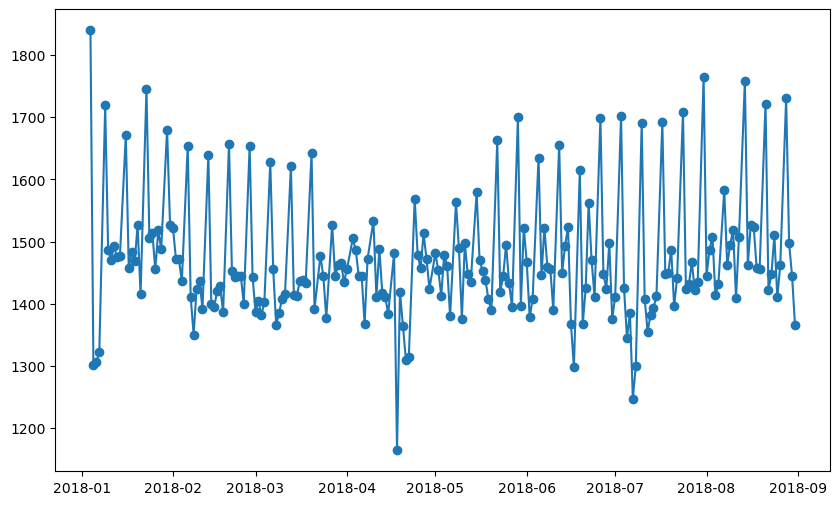

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# График количества продаж
plt.plot(merged_data['Дата'], merged_data['Количество_Продаж'], label='Количество продаж', marker='o')

# График температуры
plt.plot(merged_data['Дата'], merged_data['T'], label='Температура (°C)', marker='o')

# Настройки графика
plt.title('Количество продаж и температура', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [119]:
plt.figure(figsize=(10, 6))

# График температуры
plt.plot(merged_data['Дата'], merged_data['T'], label='Температура (°C)', color='orange', marker='o')

# Настройки графика
plt.title('Температура за период', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Температура (°C)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


KeyError: 'T'

<Figure size 1000x600 with 0 Axes>

In [121]:
print(merged_data.columns)


Index(['Дата', 'Количество_Продаж', 'Средняя температура'], dtype='object')


          Дата  Количество_Продаж      T
0   2018-01-04               1840  -12,8
1   2018-01-05               1301  -20,7
2   2018-01-06               1306  -17,6
3   2018-01-07               1322    -11
4   2018-01-09               1719  -14,1
..         ...                ...    ...
200 2018-08-26               1462   10,8
201 2018-08-28               1731   12,6
202 2018-08-29               1497   12,7
203 2018-08-30               1445     11
204 2018-08-31               1366   11,1

[205 rows x 3 columns]


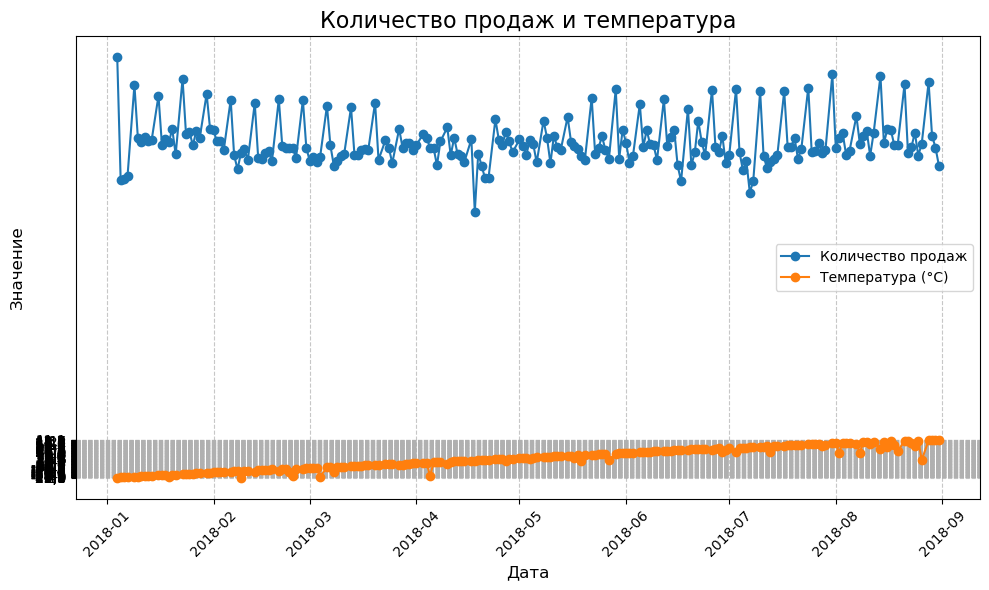

In [123]:
# Преобразуем 'Дата' в формат datetime
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'])
weather['Дата'] = pd.to_datetime(weather['Дата'])

# Переименуем столбец температуры
weather.rename(columns={'Средняя температура': 'T'}, inplace=True)

# Объединяем данные
merged_data = pd.merge(grouped_df, weather, on='Дата', how='inner')

# Проверяем наличие столбца T
print(merged_data)

# График количества продаж и температуры
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Дата'], merged_data['Количество_Продаж'], label='Количество продаж', marker='o')
plt.plot(merged_data['Дата'], merged_data['T'], label='Температура (°C)', marker='o')
plt.title('Количество продаж и температура', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()